# Start data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Load files, use lines=true, because of JSONL format (one JSON object per line)

In [2]:
try:
     merchants_df = pd.read_csv('data/merchants.csv')
     print("\nMerchants data loaded.")
except FileNotFoundError:
     print("Couldn't find merchants.csv file.")

try:
     transactions_df = pd.read_json('data/transactions.json', lines=True)
     print("\nTransactions data loaded.")
except FileNotFoundError:
     print("Couldn't find transactions.json file.")

try:
     users_df = pd.read_csv('data/users.csv')
     print("\nUsers data loaded.")
except FileNotFoundError:
     print("Couldn't find users.csv file.")


Merchants data loaded.

Transactions data loaded.

Users data loaded.


In [ ]:
# Basic information about the dataframes
print("\n--- Basic Information ---")

for df_name, df in [('merchants_df', merchants_df if 'merchants_df' in locals() else None),
                    ('transactions_df', transactions_df if 'transactions_df' in locals() else None),
                    ('users_df', users_df if 'users_df' in locals() else None)]:
    if df is not None:
        print(f"\n{df_name.upper()} Shape: {df.shape}")
        print(f"\nFirst 5 rows of {df_name}:")
        display(df.head())
        
        print(f"\nData types in {df_name}:")
        display(df.dtypes)
        print(f"\nSummary statistics for {df_name}:")
        display(df.describe(include='all').T)
        
        # Check for missing values
        missing = df.isnull().sum()
        if missing.sum() > 0:
            print(f"\nMissing values in {df_name}:")
            display(missing[missing > 0])
        else:
            print(f"\nNo missing values in {df_name}")


--- Basic Information ---

MERCHANTS_DF Shape: (1000, 8)

First 5 rows of merchants_df:


,merchant_id,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,M0001,travel,Austria,1.000000,3,97.23,84,0
1,M0002,clothing,Poland,0.689695,2,142.71,93,1
2,M0003,electronics,Czech Republic,0.834610,5,67.83,65,0
3,M0004,electronics,Belgium,0.607229,1,16.77,9,1
4,M0005,grocery,Ireland,0.641901,2,38.56,100,0



Data types in merchants_df:


merchant_id                        object
category                           object
country                            object
trust_score                       float64
number_of_alerts_last_6_months      int64
avg_transaction_amount            float64
account_age_months                  int64
has_fraud_history                   int64
dtype: object


Summary statistics for merchants_df:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
merchant_id,1000,1000,M0001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1000,7,grocery,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1000,14,Portugal,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trust_score,1000.0,NaN,NaN,NaN,0.682568,0.194092,0.0,0.545615,0.697414,0.825599,1.0
number_of_alerts_last_6_months,1000.0,NaN,NaN,NaN,3.061,1.72286,0.0,2.0,3.0,4.0,9.0
avg_transaction_amount,1000.0,NaN,NaN,NaN,81.88309,79.187529,0.12,24.7725,58.205,117.1925,709.04
account_age_months,1000.0,NaN,NaN,NaN,61.526,33.453617,6.0,32.0,61.0,92.0,119.0
has_fraud_history,1000.0,NaN,NaN,NaN,0.52,0.49985,0.0,0.0,1.0,1.0,1.0



No missing values in merchants_df

TRANSACTIONS_DF Shape: (500000, 14)

First 5 rows of transactions_df:


,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0



Data types in transactions_df:


transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object


Summary statistics for transactions_df:


In [6]:
fraud_df = transactions_df[transactions_df['is_fraud'] == 1]
print(f"\nFraudulent transactions shape: {fraud_df.shape}")
print(f"\nFraudulent transactions percentage: {len(fraud_df) / len(transactions_df) * 100:.2f}%")

fraud_by_merchant = transactions_df['merchant_id'].value_counts().reset_index()
fraud_by_merchant.columns = ['merchant_id', 'fraud_count']
merchant_stats = fraud_by_merchant.merge(merchants_df, on='merchant_id', how='left')
display(merchant_stats.head())
display(merchant_stats.describe().T)



Fraudulent transactions shape: (42411, 14)

Fraudulent transactions percentage: 8.48%


,merchant_id,fraud_count,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,M0079,571,travel,Sweden,0.295231,0,1.26,12,1
1,M0167,570,clothing,Austria,0.121984,0,77.46,78,1
2,M0187,569,restaurants,Ireland,0.739880,7,15.85,114,1
3,M0991,563,grocery,France,0.880147,4,80.02,52,1
4,M0377,558,travel,Netherlands,1.000000,3,0.67,31,1


,count,mean,std,min,25%,50%,75%,max
fraud_count,1000.0,500.000000,22.280000,429.00,485.000000,500.000000,514.000000,571.00
trust_score,1000.0,0.682568,0.194092,0.00,0.545615,0.697414,0.825599,1.00
number_of_alerts_last_6_months,1000.0,3.061000,1.722860,0.00,2.000000,3.000000,4.000000,9.00
avg_transaction_amount,1000.0,81.883090,79.187529,0.12,24.772500,58.205000,117.192500,709.04
account_age_months,1000.0,61.526000,33.453617,6.00,32.000000,61.000000,92.000000,119.00
has_fraud_history,1000.0,0.520000,0.499850,0.00,0.000000,1.000000,1.000000,1.00


In [ ]:
extend_trans = transactions_df.copy()
extend_trans['month'] = extend_trans['timestamp'].dt.month
extend_trans['weekday'] = extend_trans['timestamp'].dt.weekday
extend_trans['hour'] = extend_trans['timestamp'].dt.hour
extend_trans['quarter'] = extend_trans['timestamp'].dt.quarter
print(f"\nExtended transactions shape: {extend_trans.shape}")
print(f"\nExtended transactions head:")
display(extend_trans.head())
print(f"\nExtended transactions summary:")
display(extend_trans.describe().T)


Extended transactions shape: (500000, 18)

Extended transactions head:


,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud,month,weekday,hour,quarter
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0,6,4,23,2
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0,1,1,15,1
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0,9,4,21,3
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0,11,0,6,4
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0,4,3,8,2



Extended transactions summary:


,count,mean,min,25%,50%,75%,max,std
timestamp,500000,2022-12-31 16:45:04.497720576,2022-01-01 00:06:00,2022-07-01 11:03:45,2022-12-31 20:08:30,2023-07-02 08:45:15,2023-12-31 23:57:00,NaN
amount,500000.0,49.915662,0.0,14.37,34.56,69.1725,714.86,49.990657
is_international,500000.0,0.928662,0.0,1.0,1.0,1.0,1.0,0.257389
session_length_seconds,500000.0,614.987182,30.0,323.0,614.0,907.0,1200.0,338.091496
is_first_time_merchant,500000.0,0.501248,0.0,0.0,1.0,1.0,1.0,0.499999
is_fraud,500000.0,0.084822,0.0,0.0,0.0,0.0,1.0,0.278617
month,500000.0,6.518996,1.0,4.0,7.0,10.0,12.0,3.446728
weekday,500000.0,3.006134,0.0,1.0,3.0,5.0,6.0,2.001979
hour,500000.0,11.509294,0.0,6.0,12.0,18.0,23.0,6.920704
quarter,500000.0,2.506514,1.0,2.0,3.0,4.0,4.0,1.116306


In [ ]:
from funs import chi2_independence

chi2_independence(extend_trans, 'month', 'is_fraud', type="description")

Chi-square statistic:  8.330914982204687
p-value:  0.6833900068676846
Degrees of freedom:  11
Expected frequencies: 
month               1             2            3             4            5   \
is_fraud                                                                       
0         38731.248138  35118.125394  39247.40853  37752.922856  38899.64089   
1          3589.751862   3254.874606   3637.59147   3499.077144   3605.35911   

month               6             7            8             9             10  \
is_fraud                                                                        
0         37791.360332  38950.890858  38789.81953  37483.860524  38356.940336   
1          3502.639668   3610.109142   3595.18047   3474.139476   3555.059664   

month               11            12  
is_fraud                              
0         37447.253404  39019.529208  
1          3470.746596   3616.470792  


In [ ]:
chi2_independence(extend_trans, 'quarter', 'is_fraud', type="description")

Chi-square statistic:  0.768873773573426
p-value:  0.8568965972587906
Degrees of freedom:  3
Expected frequencies: 
quarter               1              2              3              4
is_fraud                                                            
0         113096.782062  114443.924078  115224.570912  114823.722948
1          10482.217938   10607.075922   10679.429088   10642.277052


In [ ]:
chi2_independence(extend_trans, 'weekday', 'is_fraud', type="description")

Chi-square statistic:  3.994218141876562
p-value:  0.6774589050444695
Degrees of freedom:  6
Expected frequencies: 
weekday              0            1             2             3            4  \
is_fraud                                                                       
0         65089.289716  65334.55742  65513.932308  64962.079974  65092.03525   
1          6032.710284   6055.44258   6072.067692   6020.920026   6032.96475   

weekday              5             6  
is_fraud                              
0         65625.584024  65971.521308  
1          6082.415976   6114.478692  


In [ ]:
chi2_independence(extend_trans, 'hour', 'is_fraud', type="description")

Chi-square statistic:  15.527870097144085
p-value:  0.8747230024433464
Degrees of freedom:  23
Expected frequencies: 
hour                0             1             2             3   \
is_fraud                                                           
0         19029.296154  18867.309648  19118.983598  18924.050684   
1          1763.703846   1748.690352   1772.016402   1753.949316   

hour                4             5             6             7   \
is_fraud                                                           
0         19042.108646  19257.175476  19065.903274  19215.992466   
1          1764.891354   1784.824524   1767.096726   1781.007534   

hour                8             9   ...            14            15  \
is_fraud                              ...                               
0         18871.885538  19062.242562  ...  19002.755992  19002.755992   
1          1749.114462   1766.757438  ...   1761.244008   1761.244008   

hour               16           17         

In [19]:
# positive = transactions_df.copy()
# positive = positive[positive['is_fraud'] == 1]
# users_with_fraud = users_df.copy()
# users_with_fraud['fraud_count'] = 0
# for i in range(len(positive)):
#     users_with_fraud.loc[users_with_fraud['user_id'] == positive.iloc[i]['user_id'], 'fraud_count'] += 1
# users_with_fraud = users_with_fraud[users_with_fraud['fraud_count'] > 0]
# users_with_fraud.sort_values(by='fraud_count', ascending=False, inplace=True)
display(users_with_fraud.head(30))
print(f"\nUsers with fraud shape: {users_with_fraud.shape}")
print(f"\nUsers with fraud summary:")
display(users_with_fraud.describe().T)
display(users_df.describe().T)

,user_id,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score,fraud_count
1948,U01949,22,Female,High School,Savings,11.74,2455.65,Poland,2022-09-07,0.125323,11
263,U00264,41,Male,Master,Savings,426.13,1222.48,Finland,2022-12-21,0.299698,10
9201,U09202,61,Female,PhD,Savings,65.83,574.76,Czech Republic,2021-11-28,0.279310,9
2577,U02578,23,Female,NaN,Retirement,491.99,1416.98,Finland,2021-03-07,0.196204,9
18180,U18181,32,Other,PhD,Business,0.52,2720.95,Portugal,2020-06-13,0.373086,9
12219,U12220,56,Female,Bachelor,Unemployment,216.53,188.40,Czech Republic,2024-08-29,0.542549,9
10043,U10044,20,Female,Master,Retirement,452.60,298.03,Austria,2024-12-22,0.492586,9
12300,U12301,24,Male,High School,Retirement,194.62,73.69,Denmark,2024-09-05,0.342786,9
14140,U14141,32,Male,High School,Unemployment,65.69,175.76,France,2020-05-05,0.374425,9
1360,U01361,68,Male,Master,Savings,216.77,2332.51,Italy,2020-08-30,0.174371,8



Users with fraud shape: (17570, 11)

Users with fraud summary:


,count,mean,std,min,25%,50%,75%,max
age,17570.0,46.001764,16.520710,18.00,32.000000,46.000000,60.000000,74.00
sum_of_monthly_installments,17570.0,301.530915,305.004011,0.01,87.432500,206.925000,417.455000,3165.70
sum_of_monthly_expenses,17570.0,1184.997870,1173.496644,0.04,354.492500,825.865000,1654.962500,10994.33
risk_score,17570.0,0.497842,0.149533,0.00,0.395909,0.496478,0.599653,1.00
fraud_count,17570.0,2.413830,1.330262,1.00,1.000000,2.000000,3.000000,11.00


,count,mean,std,min,25%,50%,75%,max
age,20000.0,45.973300,16.520649,18.00,32.00000,46.000000,60.000000,74.00
sum_of_monthly_installments,20000.0,301.669748,304.160334,0.01,87.76750,207.650000,418.272500,3165.70
sum_of_monthly_expenses,20000.0,1184.221874,1172.054772,0.04,353.65500,824.885000,1651.987500,10994.33
risk_score,20000.0,0.501277,0.149876,0.00,0.39848,0.500119,0.603234,1.00


Statistical significance tests for categorical variables:

sex - ANOVA test:
F-statistic: 1.0481
p-value: 0.3506
Statistically significant: No


<Figure size 1400x1000 with 0 Axes>

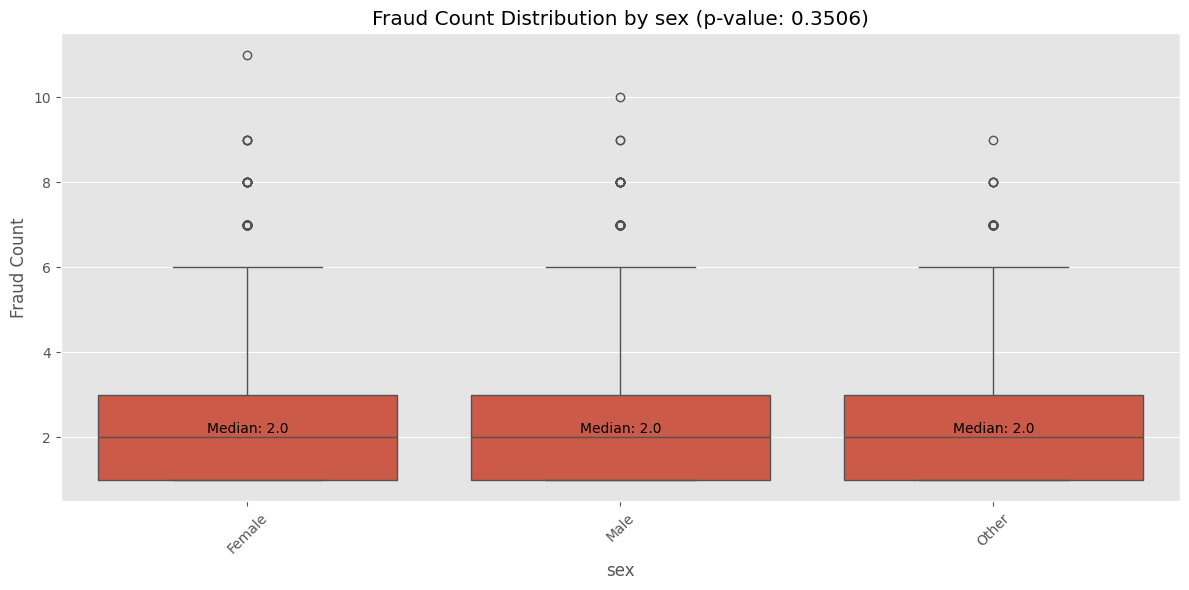


education - ANOVA test:
F-statistic: 0.5666
p-value: 0.6370
Statistically significant: No


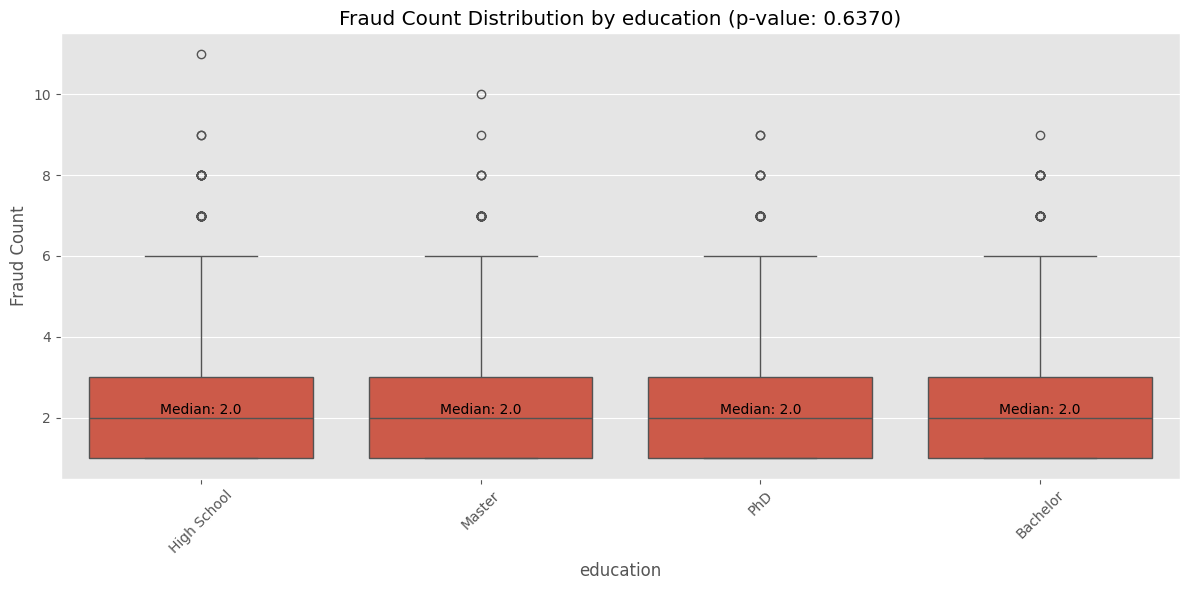


primary_source_of_income - ANOVA test:
F-statistic: 0.4413
p-value: 0.8199
Statistically significant: No


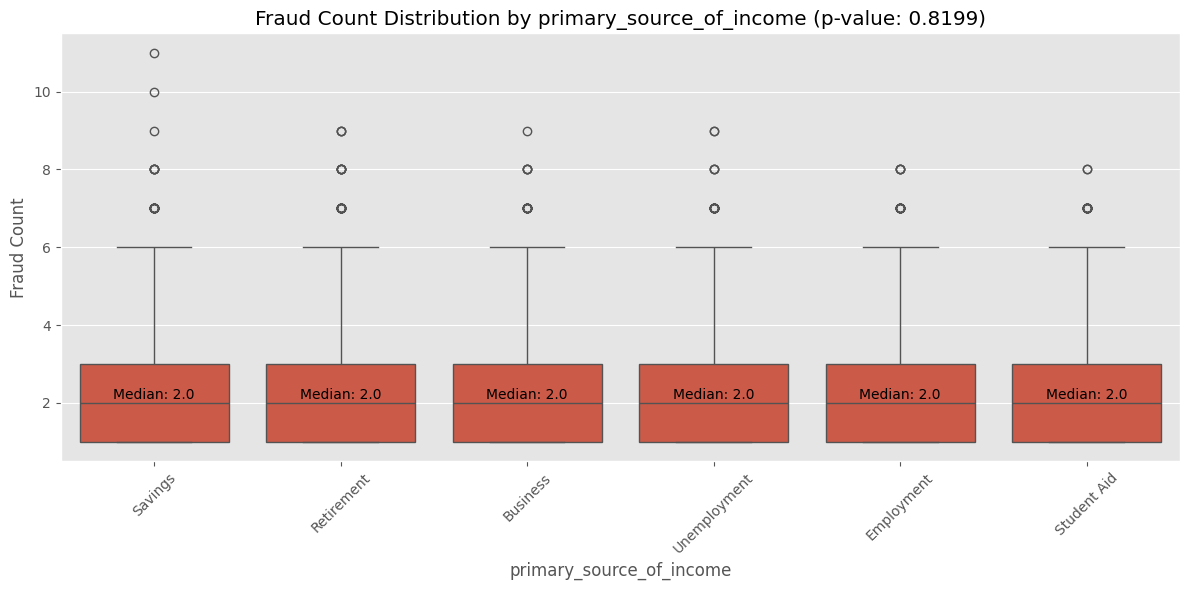


country - ANOVA test:
F-statistic: 0.7336
p-value: 0.7312
Statistically significant: No


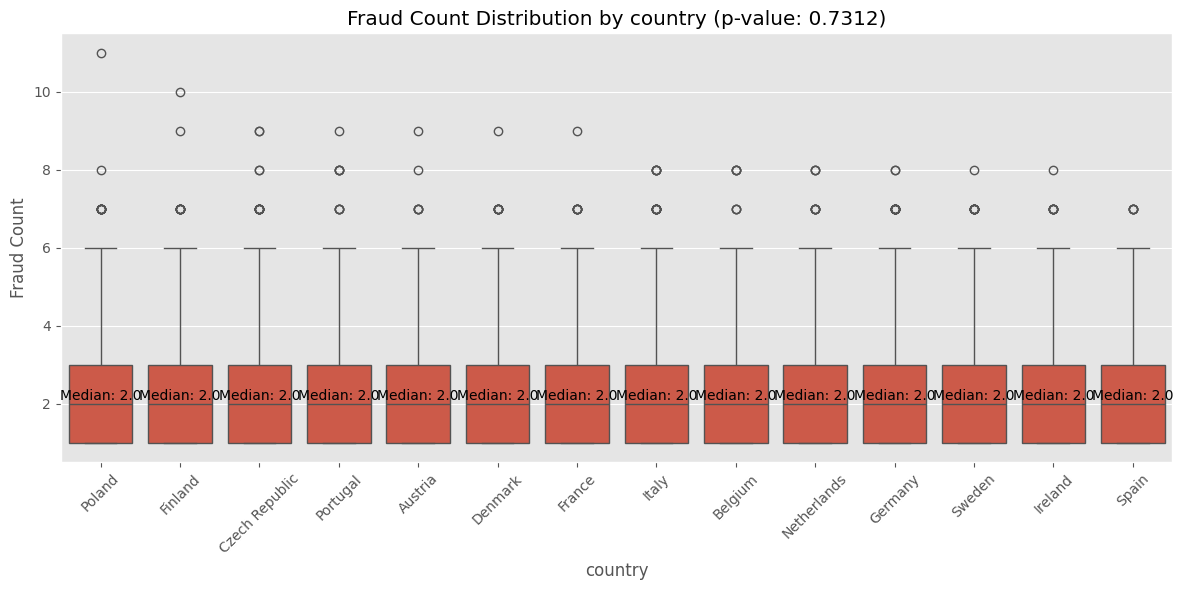


age_group - ANOVA test:
F-statistic: 1.6235
p-value: 0.1361
Statistically significant: No


/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_62706/4143429615.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[target].values for name, group in df_valid.groupby(column)]
/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_62706/4143429615.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_valid.groupby(column)[target].median().values


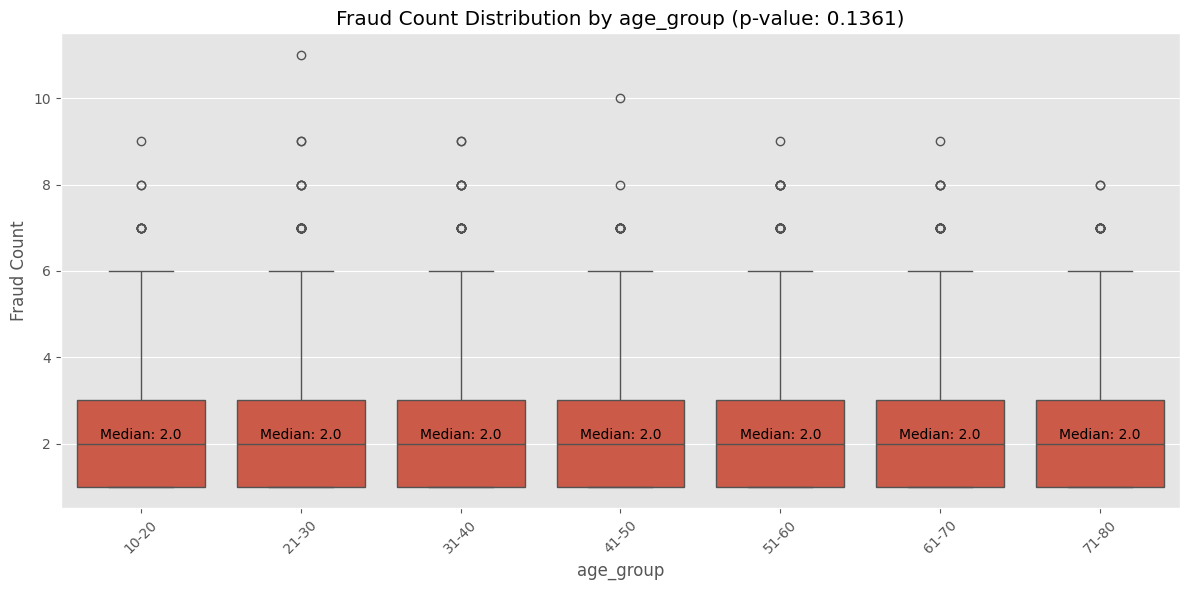


Statistical significance tests for numerical variables:

age - Spearman correlation test:
Correlation coefficient: 0.0020
p-value: 0.7943
Statistically significant: No


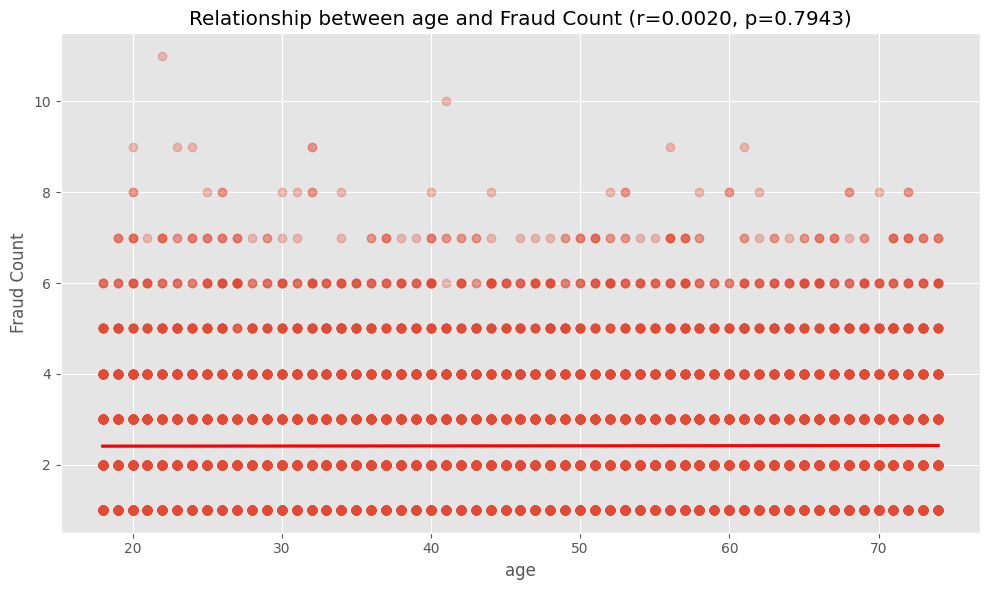


sum_of_monthly_installments - Spearman correlation test:
Correlation coefficient: -0.0028
p-value: 0.7101
Statistically significant: No


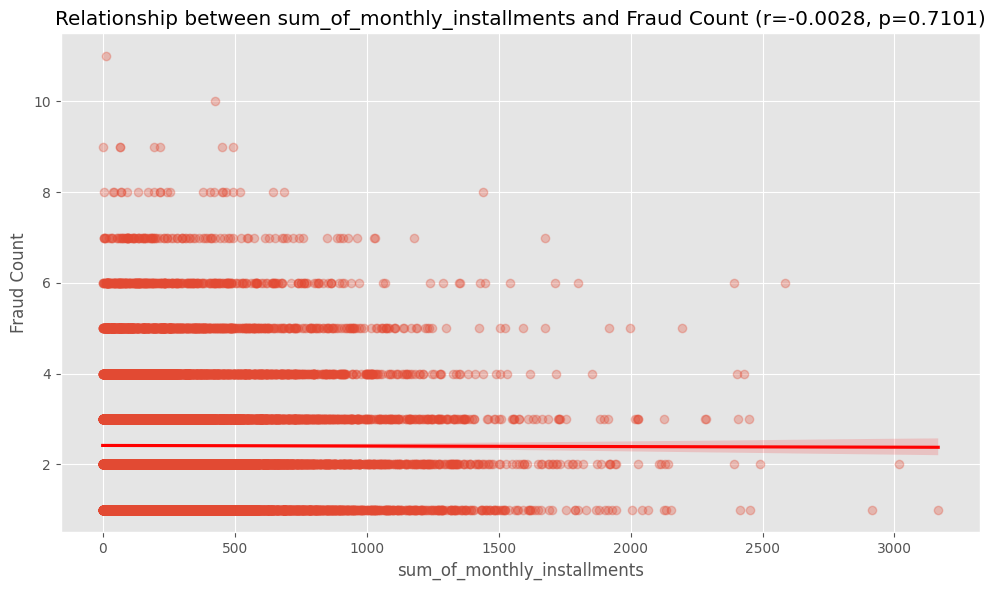


sum_of_monthly_expenses - Spearman correlation test:
Correlation coefficient: -0.0041
p-value: 0.5855
Statistically significant: No


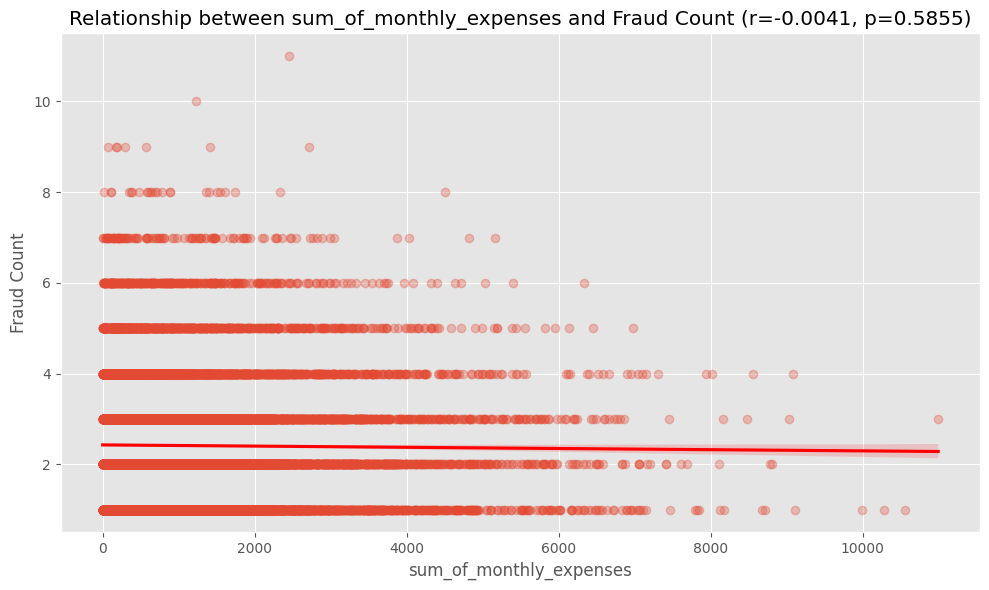


risk_score - Spearman correlation test:
Correlation coefficient: -0.0978
p-value: 0.0000
Statistically significant: Yes


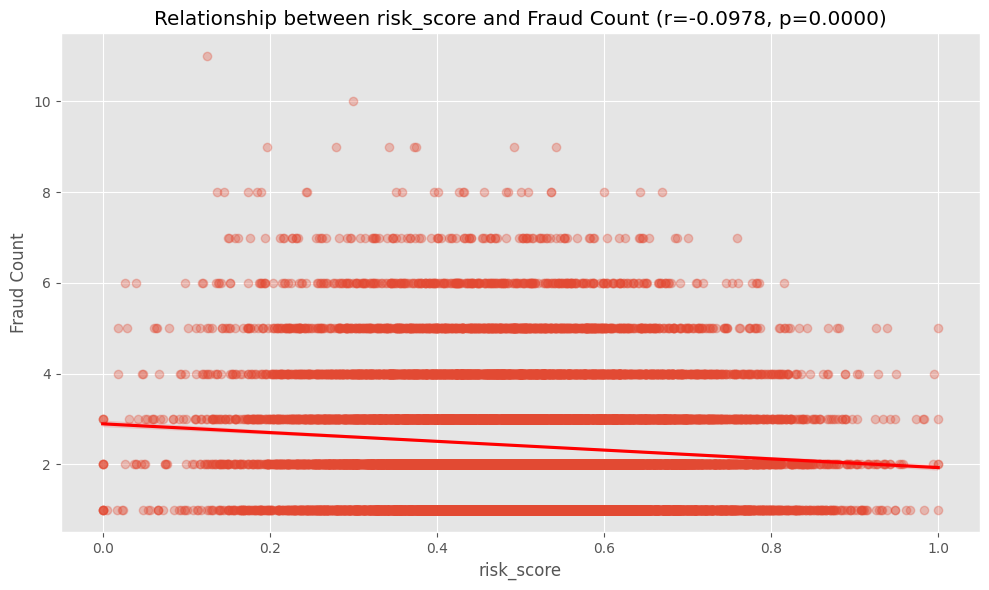


Chi-Square tests for association between categorical variables and fraud tendency:

sex vs High Fraud Tendency - Chi-square test:
Chi-square: 2.3896
p-value: 0.3028
Degrees of freedom: 2
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

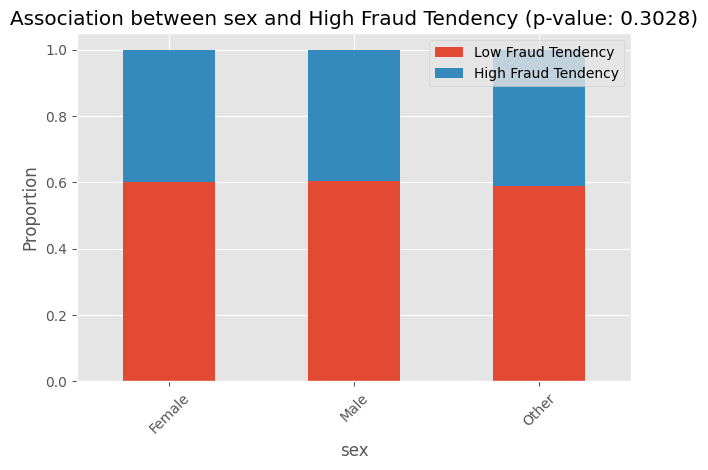


education vs High Fraud Tendency - Chi-square test:
Chi-square: 0.6263
p-value: 0.8904
Degrees of freedom: 3
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

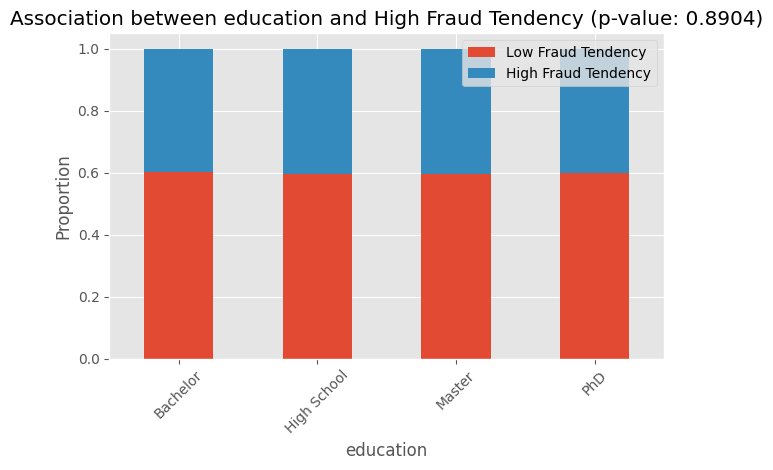


primary_source_of_income vs High Fraud Tendency - Chi-square test:
Chi-square: 1.3242
p-value: 0.9324
Degrees of freedom: 5
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

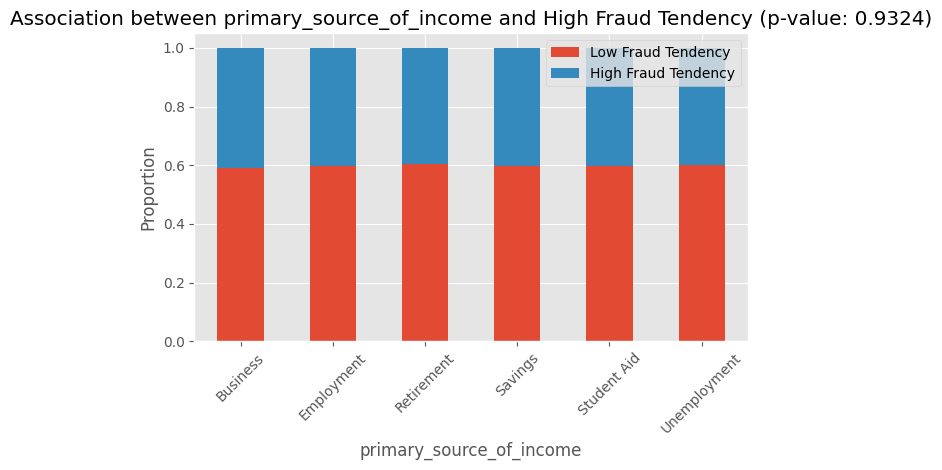


country vs High Fraud Tendency - Chi-square test:
Chi-square: 12.9822
p-value: 0.4492
Degrees of freedom: 13
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

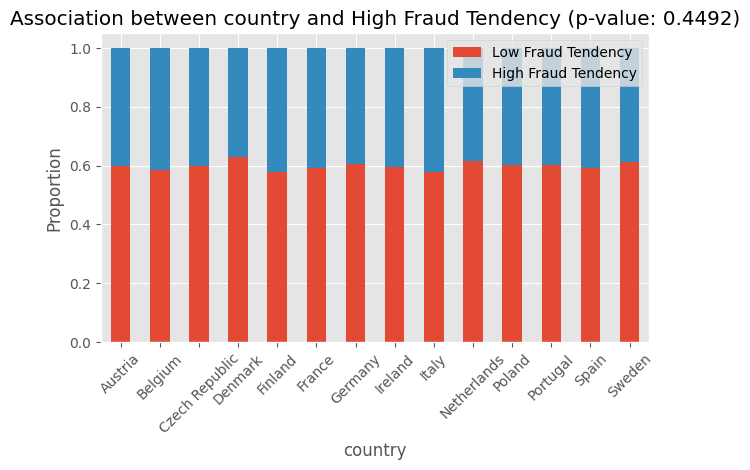


age_group vs High Fraud Tendency - Chi-square test:
Chi-square: 3.5933
p-value: 0.7315
Degrees of freedom: 6
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

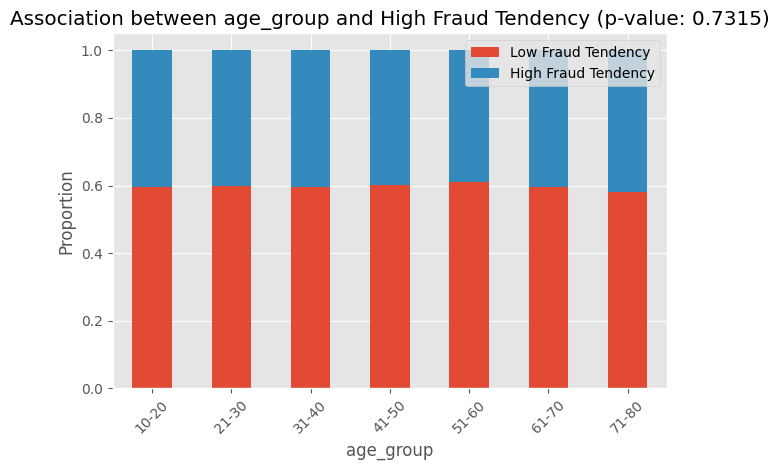


T-tests for binary variables:


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform statistical tests to check the significance of different variables
# in users_with_fraud on the number of fraud incidents per user

import scipy.stats as stats
import matplotlib.pyplot as plt

# Set the style for plots
plt.style.use('ggplot')
plt.figure(figsize=(14, 10))

# 1. ANOVA test for categorical variables
print("Statistical significance tests for categorical variables:")

# Function to perform ANOVA and create boxplot
def test_categorical_variable(df, column, target='fraud_count'):
     # Remove NaN values
     df_valid = df.dropna(subset=[column])
     
     # Group data by the categorical variable
     groups = [group[target].values for name, group in df_valid.groupby(column)]
     
     # Perform ANOVA test
     f_stat, p_value = stats.f_oneway(*groups)
     
     print(f"\n{column} - ANOVA test:")
     print(f"F-statistic: {f_stat:.4f}")
     print(f"p-value: {p_value:.4f}")
     print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")
     
     # Create boxplot
     plt.figure(figsize=(12, 6))
     ax = sns.boxplot(x=column, y=target, data=df_valid)
     ax.set_title(f'Fraud Count Distribution by {column} (p-value: {p_value:.4f})')
     ax.set_xlabel(column)
     ax.set_ylabel('Fraud Count')
     
     # Add median values
     medians = df_valid.groupby(column)[target].median().values
     for i, median in enumerate(medians):
          ax.text(i, median + 0.1, f'Median: {median:.1f}', ha='center')
     
     plt.xticks(rotation=45)
     plt.tight_layout()
     plt.show()
     
     # If significant, perform post-hoc Tukey test
     if p_value < 0.05 and len(groups) > 2:
          tukey = pairwise_tukeyhsd(df_valid[target], df_valid[column], alpha=0.05)
          print("\nTukey HSD post-hoc test:")
          print(tukey)

# Test categorical variables
categorical_vars = ['sex', 'education', 'primary_source_of_income', 'country', 'age_group']
for var in categorical_vars:
     test_categorical_variable(users_with_fraud, var)

# 2. Correlation test for numerical variables
print("\nStatistical significance tests for numerical variables:")

# Function to test correlation with fraud_count
def test_numerical_variable(df, column, target='fraud_count'):
     # Remove NaN values
     df_valid = df.dropna(subset=[column])
     
     # Calculate Spearman rank correlation (doesn't require normal distribution)
     corr, p_value = stats.spearmanr(df_valid[column], df_valid[target])
     
     print(f"\n{column} - Spearman correlation test:")
     print(f"Correlation coefficient: {corr:.4f}")
     print(f"p-value: {p_value:.4f}")
     print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")
     
     # Create scatter plot with trend line
     plt.figure(figsize=(10, 6))
     ax = sns.regplot(x=column, y=target, data=df_valid, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
     ax.set_title(f'Relationship between {column} and Fraud Count (r={corr:.4f}, p={p_value:.4f})')
     ax.set_xlabel(column)
     ax.set_ylabel('Fraud Count')
     plt.tight_layout()
     plt.show()

# Test numerical variables
numerical_vars = ['age', 'sum_of_monthly_installments', 'sum_of_monthly_expenses', 'risk_score']
for var in numerical_vars:
     test_numerical_variable(users_with_fraud, var)

# 3. Chi-Square test for association between categorical variables
print("\nChi-Square tests for association between categorical variables and fraud tendency:")

def chi2_test_with_fraud_tendency(df, column):
     # Create a binary variable for fraud tendency (high vs low)
     df = df.copy()
     median_fraud = df['fraud_count'].median()
     df['high_fraud'] = (df['fraud_count'] > median_fraud).astype(int)
     
     # Create contingency table
     contingency = pd.crosstab(df[column], df['high_fraud'])
     
     # Chi-square test
     chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
     
     print(f"\n{column} vs High Fraud Tendency - Chi-square test:")
     print(f"Chi-square: {chi2:.4f}")
     print(f"p-value: {p_value:.4f}")
     print(f"Degrees of freedom: {dof}")
     print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")
     
     # Create a stacked bar chart
     plt.figure(figsize=(12, 6))
     pd.crosstab(df[column], df['high_fraud'], normalize='index').plot(kind='bar', stacked=True)
     plt.title(f'Association between {column} and High Fraud Tendency (p-value: {p_value:.4f})')
     plt.xlabel(column)
     plt.ylabel('Proportion')
     plt.legend(['Low Fraud Tendency', 'High Fraud Tendency'])
     plt.xticks(rotation=45)
     plt.tight_layout()
     plt.show()

# Test categorical variables with chi-square
for var in categorical_vars:
     chi2_test_with_fraud_tendency(users_with_fraud.dropna(subset=[var]), var)

# 4. T-tests for binary categorical variables
print("\nT-tests for binary variables:")

def t_test_for_binary(df, column):
     unique_values = df[column].unique()
     if len(unique_values) == 2:
          group1 = df[df[column] == unique_values[0]]['fraud_count']
          group2 = df[df[column] == unique_values[1]]['fraud_count']
          
          t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
          
          print(f"\n{column} - T-test between {unique_values[0]} and {unique_values[1]}:")
          print(f"T-statistic: {t_stat:.4f}")
          print(f"p-value: {p_value:.4f}")
          print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")

/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_62706/2681576512.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


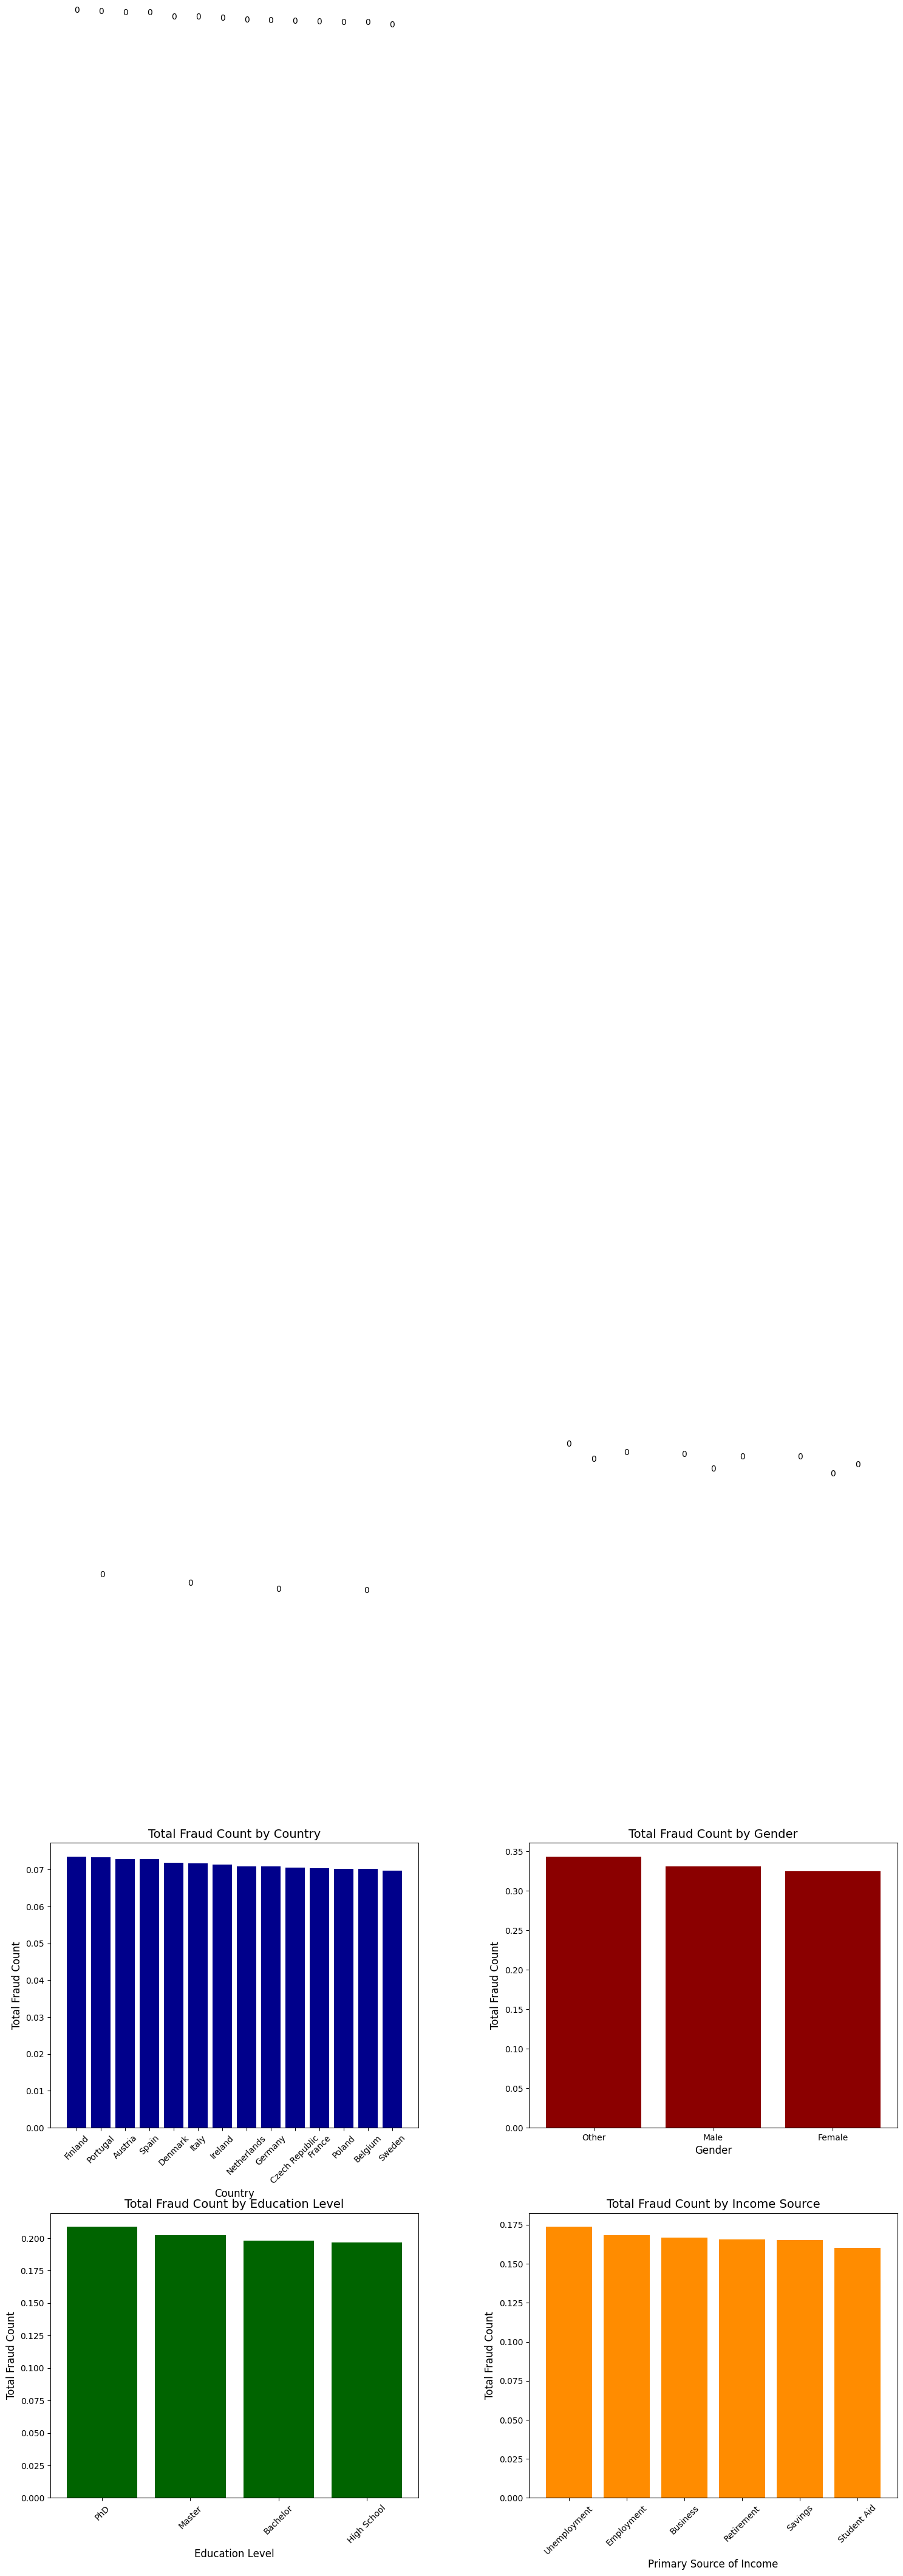

/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_62706/2681576512.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_fraud = users_with_fraud.groupby('age_group')['fraud_count'].sum().sort_values(ascending=False)


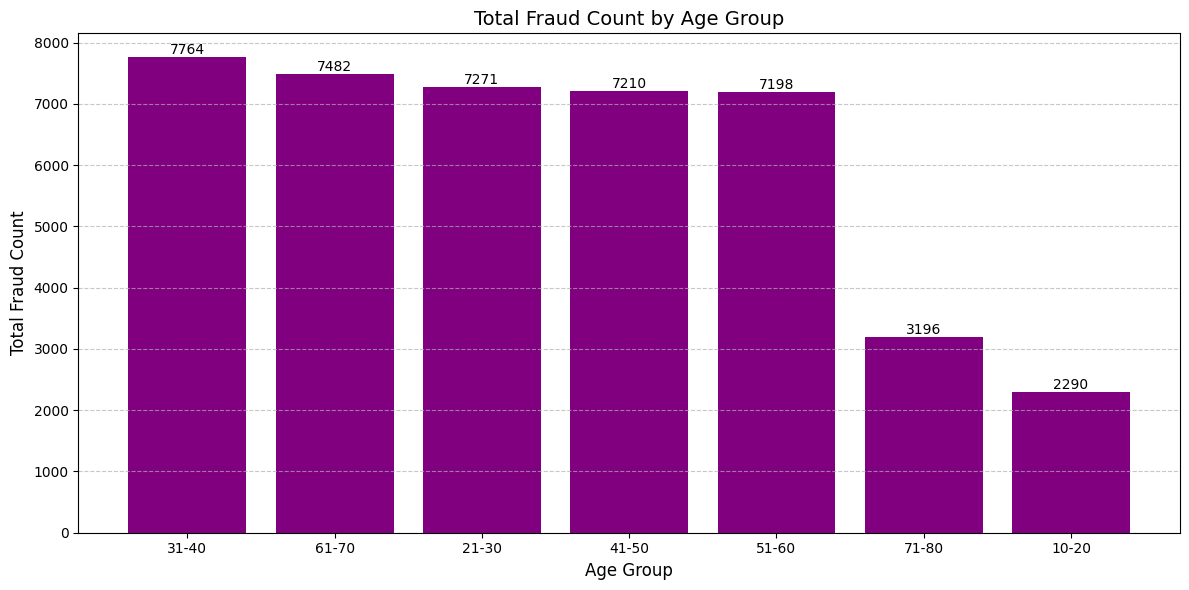

In [ ]:
# Create visualizations for fraud counts by categorical variables in users_with_fraud

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. Fraud count by country
country_fraud = users_with_fraud.groupby('country')['fraud_count'].sum().sort_values(ascending=False)
axes[0, 0].bar(country_fraud.index, country_fraud.values, color='darkblue')
axes[0, 0].set_title('Total Fraud Count by Country', fontsize=14)
axes[0, 0].set_xlabel('Country', fontsize=12)
axes[0, 0].set_ylabel('Total Fraud Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(country_fraud.values):
     axes[0, 0].text(i, v + 0.5, str(int(v)), ha='center')

# 2. Fraud count by gender
gender_fraud = users_with_fraud.groupby('sex')['fraud_count'].sum().sort_values(ascending=False)
axes[0, 1].bar(gender_fraud.index, gender_fraud.values, color='darkred')
axes[0, 1].set_title('Total Fraud Count by Gender', fontsize=14)
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Total Fraud Count', fontsize=12)
for i, v in enumerate(gender_fraud.values):
     axes[0, 1].text(i, v + 0.5, str(int(v)), ha='center')

# 3. Fraud count by education level
# Drop NaN values for education
education_fraud = users_with_fraud.dropna(subset=['education']).groupby('education')['fraud_count'].sum().sort_values(ascending=False)
axes[1, 0].bar(education_fraud.index, education_fraud.values, color='darkgreen')
axes[1, 0].set_title('Total Fraud Count by Education Level', fontsize=14)
axes[1, 0].set_xlabel('Education Level', fontsize=12)
axes[1, 0].set_ylabel('Total Fraud Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(education_fraud.values):
     axes[1, 0].text(i, v + 0.5, str(int(v)), ha='center')

# 4. Fraud count by primary source of income
income_fraud = users_with_fraud.groupby('primary_source_of_income')['fraud_count'].sum().sort_values(ascending=False)
axes[1, 1].bar(income_fraud.index, income_fraud.values, color='darkorange')
axes[1, 1].set_title('Total Fraud Count by Income Source', fontsize=14)
axes[1, 1].set_xlabel('Primary Source of Income', fontsize=12)
axes[1, 1].set_ylabel('Total Fraud Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(income_fraud.values):
     axes[1, 1].text(i, v + 0.5, str(int(v)), ha='center')

plt.tight_layout()
plt.show()

# Additional visualization: Age distribution of fraudulent users
plt.figure(figsize=(12, 6))
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
users_with_fraud['age_group'] = pd.cut(users_with_fraud['age'], bins=age_bins, labels=age_labels)
age_group_fraud = users_with_fraud.groupby('age_group')['fraud_count'].sum().sort_values(ascending=False)

bars = plt.bar(age_group_fraud.index, age_group_fraud.values, color='purple')
plt.title('Total Fraud Count by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Fraud Count', fontsize=12)
for bar in bars:
     height = bar.get_height()
     plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_62706/1541789949.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_trust = merchants_df.groupby('trust_score_bin')['has_fraud_history'].mean() * 100


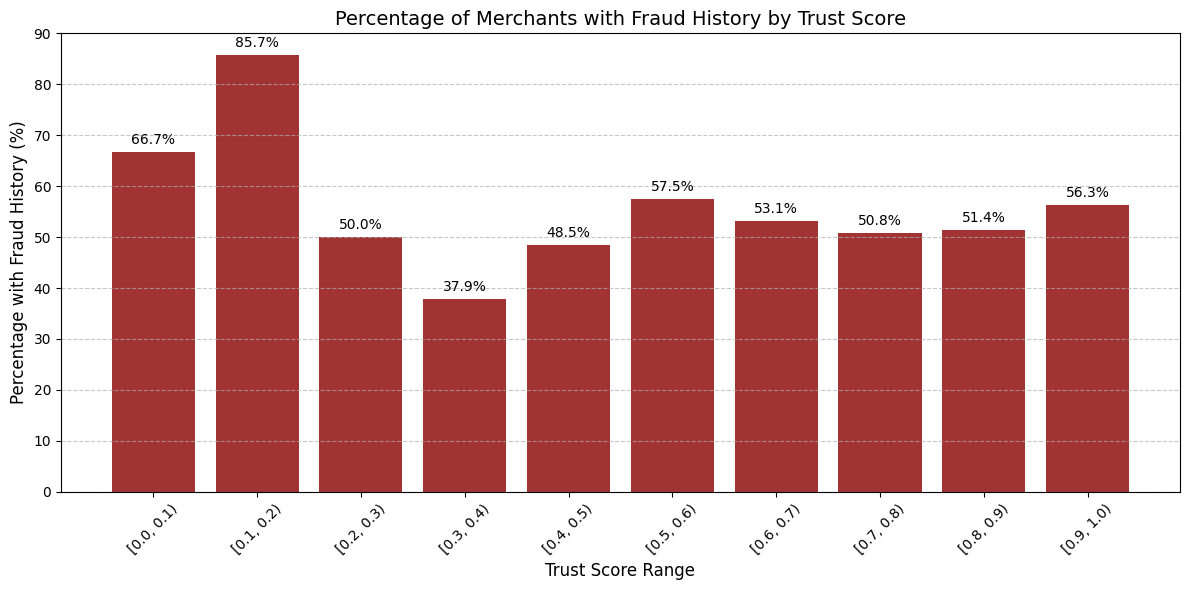

In [12]:
trust_score_bins = np.arange(0, 1.1, 0.1)
merchants_df['trust_score_bin'] = pd.cut(merchants_df['trust_score'], bins=trust_score_bins, right=False)

fraud_by_trust = merchants_df.groupby('trust_score_bin')['has_fraud_history'].mean() * 100

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_by_trust.index.astype(str), fraud_by_trust.values, color='darkred', alpha=0.8)

# Add labels and title
plt.xlabel('Trust Score Range', fontsize=12)
plt.ylabel('Percentage with Fraud History (%)', fontsize=12)
plt.title('Percentage of Merchants with Fraud History by Trust Score', fontsize=14)
plt.xticks(rotation=45)

# Add values on top of bars
for bar in bars:
     height = bar.get_height()
     plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()